# Train/Test and Cross Validation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['lines.markersize'] = 10
plt.rcParams['figure.figsize'] = [8, 6]

# Exercise

Fit the following $x$ vs. $y$ data with a series of polynomial models from degree 0 to 5.

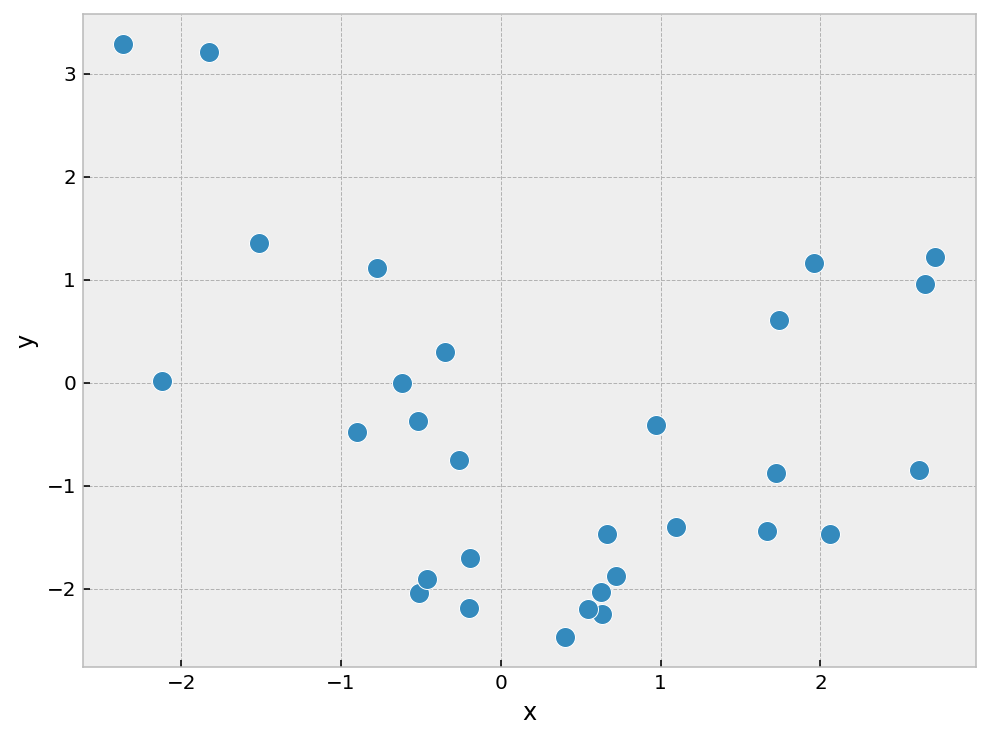

In [2]:
# data
x = np.array([-1.51194917, -0.35259945, -0.62124083, -0.77317774,  1.72056723,
       -0.50984698, -0.20047849,  0.66310664, -0.5212926 ,  2.71761964,
        1.9592446 ,  0.62961848, -2.36181885,  0.96958729, -0.46035628,
        0.40432464, -0.26511359,  1.73803833, -0.19599021,  0.63550634,
       -0.90180419, -2.12003443, -1.82638057,  0.54310286,  2.61477581,
        1.09420987,  2.65622622,  2.05776625,  0.71981851,  1.66798961])
y = np.array([ 1.3602055 ,  0.30283751, -0.00732623,  1.10948672, -0.87715488,
       -2.04098251, -2.18897935, -1.47098137, -0.36907908,  1.21921831,
        1.15865001, -2.03247401,  3.28957677, -0.41322767, -1.90914743,
       -2.46896089, -0.74630152,  0.61039472, -1.70399713, -2.24478022,
       -0.47809011,  0.01491892,  3.20748631, -2.20110028, -0.85001201,
       -1.40306547,  0.95984563, -1.46952705, -1.88071034, -1.44336616])
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

In [3]:
# polynomial models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

models = []
Xpolys = []
for degree in range(6):
    # prepare the data
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly = ...
    
    # create model
    model = ...
    
    # fit model to x,y data
    ...
    
    # save model and polynomial transformed features
    models.append(model)
    Xpoly.append(Xpoly)

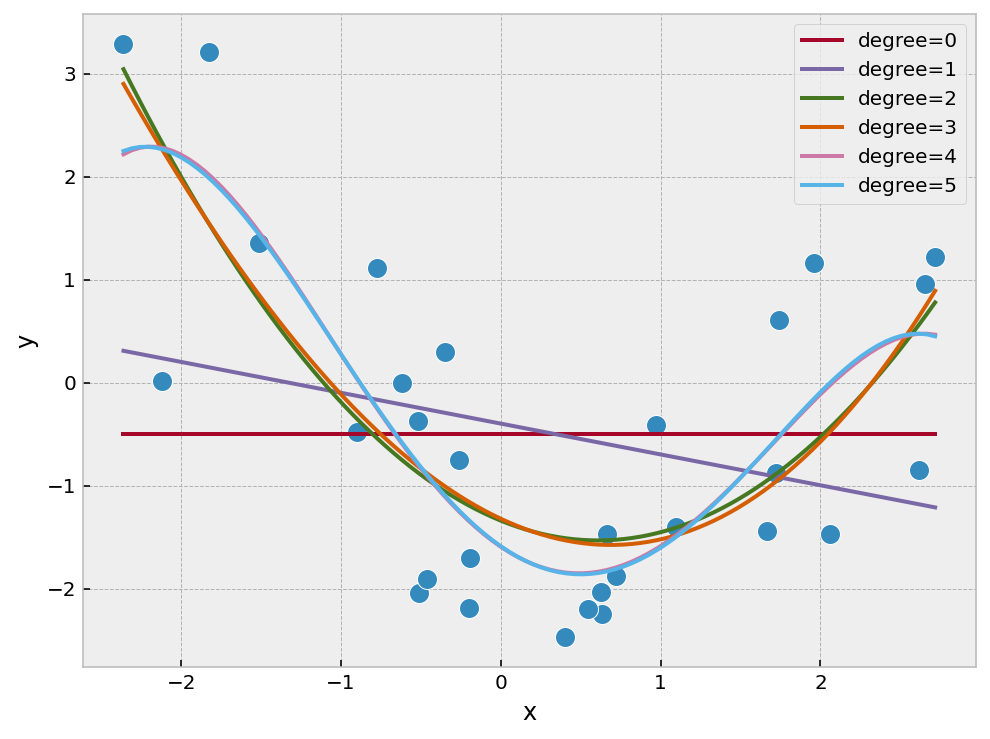

In [4]:
plt.plot(x, y, 'o')

xrange = np.linspace(x.min(), x.max(), 100)

for model in models:
    lin2poly = PolynomialFeatures(degree=model.rank_)
    Xrange = lin2poly.fit_transform(xrange.reshape([-1,1]))
    plt.plot(xrange, model.predict(Xrange), 
             label=f'degree={model.rank_}')
    
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# Exercise

Compute mean squared error ($MSE$) and $R^2$ for each model.

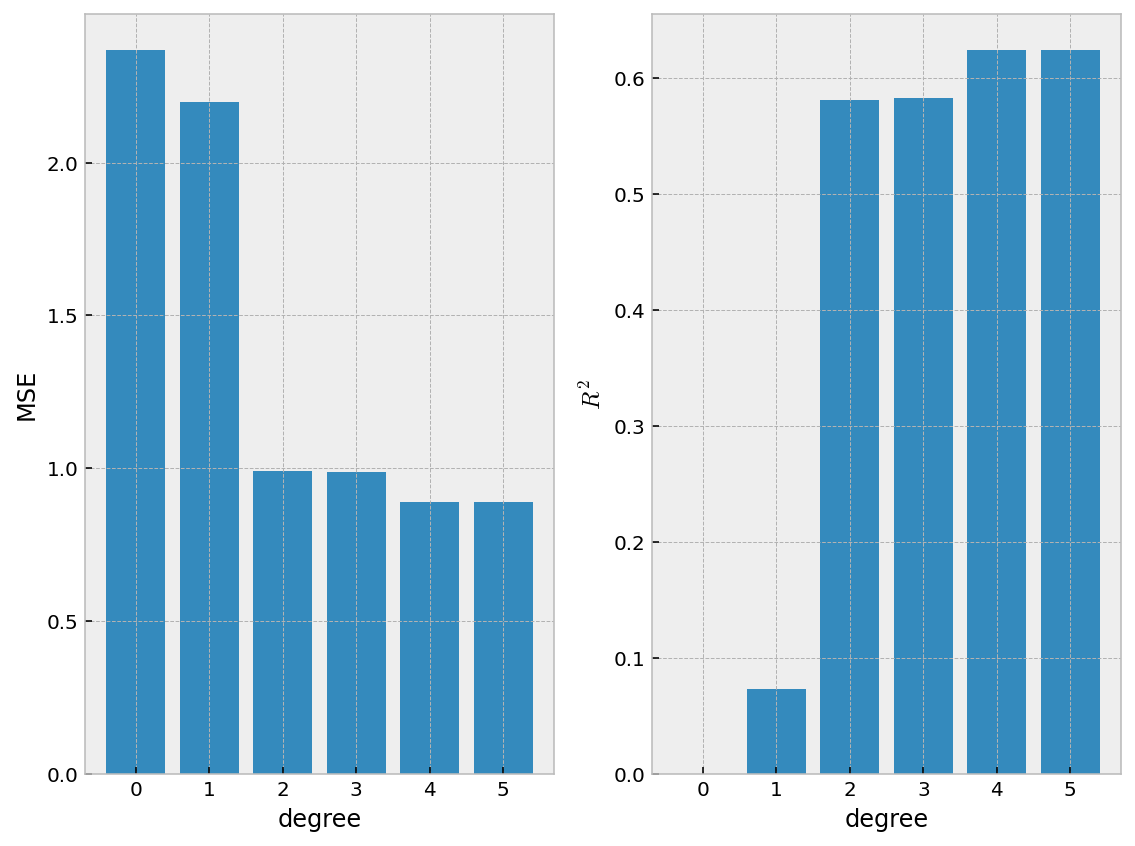

In [5]:
# MSE and R^2
mse = []
R2 = []
for model, Xpoly in zip(models, Xpolys):
    residuals = ...
    
    mse.append(...)
    R2.append(...)

degrees = range(6)
plt.subplot(121)
plt.bar(degrees, mse)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.subplot(122)
plt.bar(degrees, R2)
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.tight_layout();

You collect some new data that you'd like to test your model on.

In [92]:
x_test = np.array([ 2.28661918,  0.48763724,  2.29041217,  1.15518954,  1.35152568,
        0.00794629,  2.73650181,  0.8639412 , -0.45686971,  0.63835928,
       -2.88484081, -1.1905511 ,  0.96104122, -1.25953436,  0.70809257,
       -0.42738779, -2.18715561, -1.21030604,  0.41978946,  0.54523657])
y_test = np.array([ 2.80956706, -1.3438025 ,  0.09435006,  0.08933829, -1.79290739,
       -1.20542675,  3.69919231, -2.2725569 , -0.72032099, -1.30865004,
        9.58357284, -0.49143777, -1.73920281,  2.17234705, -2.90126534,
       -1.53958642,  4.53565175,  2.52441049, -1.57127151, -1.84049182])

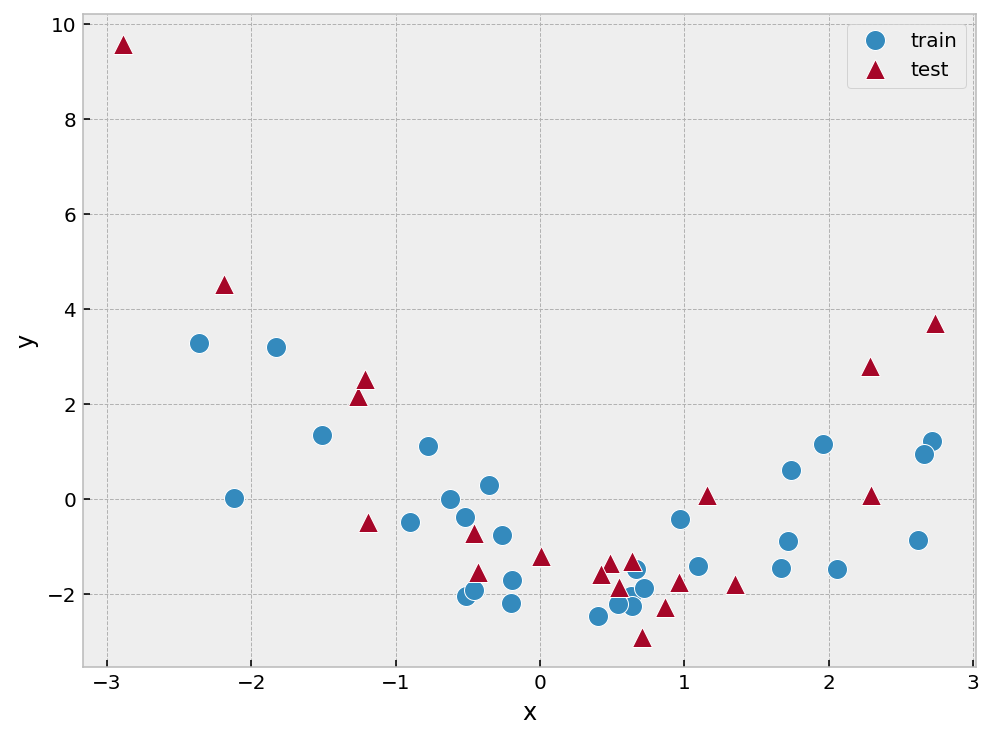

In [7]:
plt.plot(x, y, 'o', label='train')
plt.plot(x_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

Transform the `x_test` data for each polynomial model.

In [8]:
Xpolys_test = []
for model in models:
    lin2poly = PolynomialFeatures(degree=model.rank_)
    Xpoly = lin2poly.fit_transform(x_test.reshape([-1,1]))
    Xpolys_test.append(Xpoly)

Compute mean squared error ($MSE$) and $R^2$ for each model on the new data which the model's were NOT trained on.

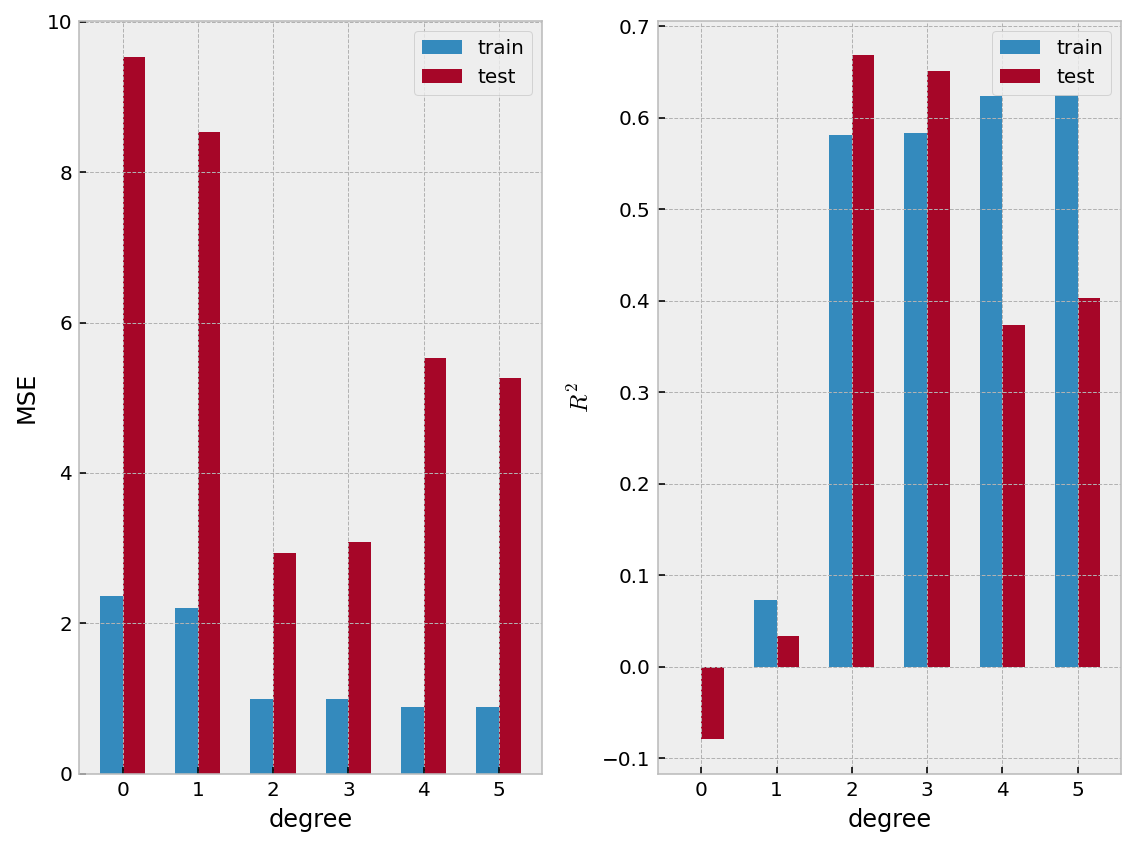

In [9]:
# test MSE and R^2
test_mse = []
test_R2 = []
for model, Xpoly_test in zip(models, Xpolys_test):
    residuals = y_test - model.predict(Xpoly_test)
    
    test_mse.append((residuals**2).mean())
    test_R2.append(model.score(Xpoly_test, y_test))

degrees = np.arange(6)
plt.subplot(121)
plt.bar(degrees - 0.15, mse, width=0.3, label='train')
plt.bar(degrees + 0.15, test_mse, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.subplot(122)
plt.bar(degrees - 0.15, R2, width=0.3, label='train')
plt.bar(degrees + 0.15, test_R2, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.legend()
plt.tight_layout();

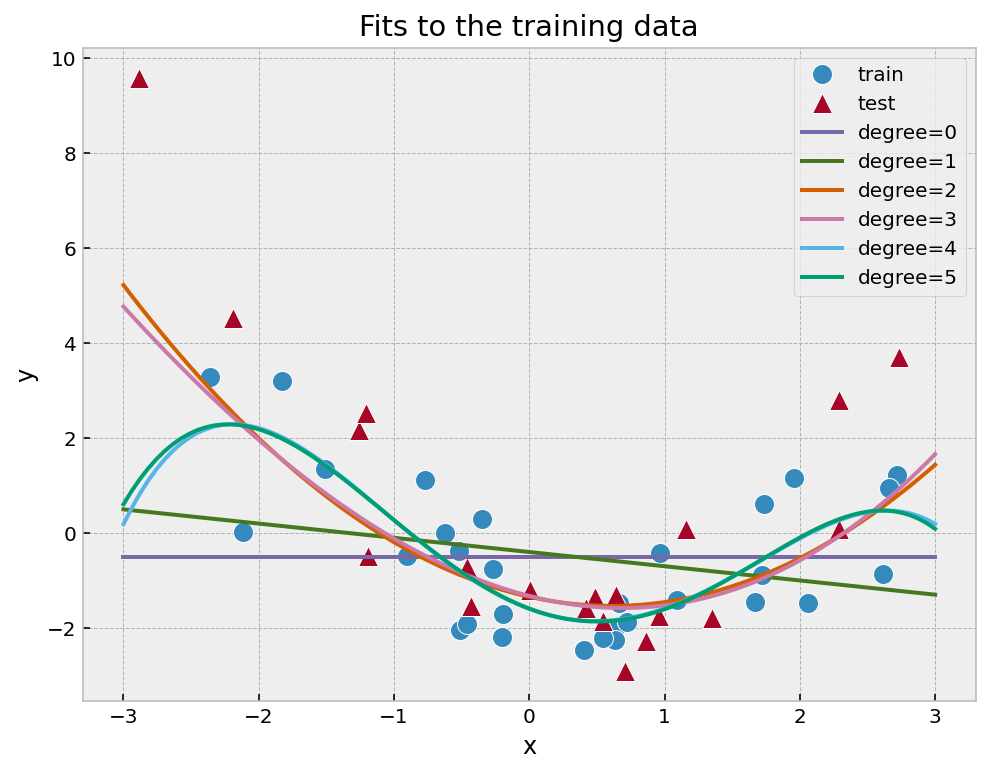

In [10]:
plt.plot(x, y, 'o', label='train')
plt.plot(x_test, y_test, '^', label='test')

xrange = np.linspace(-3, 3, 100)
for model in models:
    lin2poly = PolynomialFeatures(degree=model.rank_)
    Xrange = lin2poly.fit_transform(xrange.reshape([-1,1]))
    plt.plot(xrange, model.predict(Xrange), 
             label=f'degree={model.rank_}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fits to the training data')
plt.legend();

Train/Test split

In [93]:
# put all the data together
X_all = np.hstack([x, x_test]).reshape([-1, 1])
y_all = np.hstack([y, y_test])

X_all.shape, y_all.shape

((50, 1), (50,))

In [94]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    shuffle=True, test_size=0.2, 
                                                    random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 1), (10, 1), (40,), (10,))

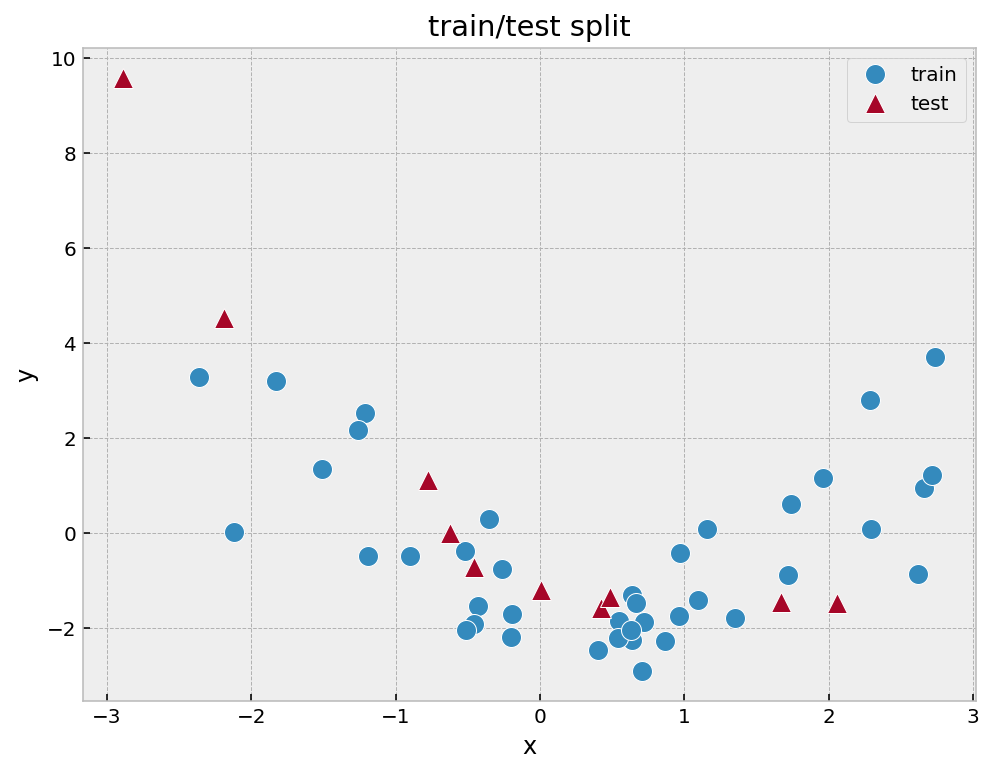

In [26]:
plt.plot(X_train, y_train, 'o', label='train')
plt.plot(X_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('train/test split')
plt.legend();

Train each model on the training set and evaluate it's error on the test set.

In [27]:
test_mse = []
for degree in range(6):
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly_train = lin2poly.fit_transform(X_train)
    Xpoly_test = lin2poly.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(Xpoly_train, y_train)
    
    test_SE = (y_test - model.predict(Xpoly_test))**2
    test_mse.append(test_SE.mean())

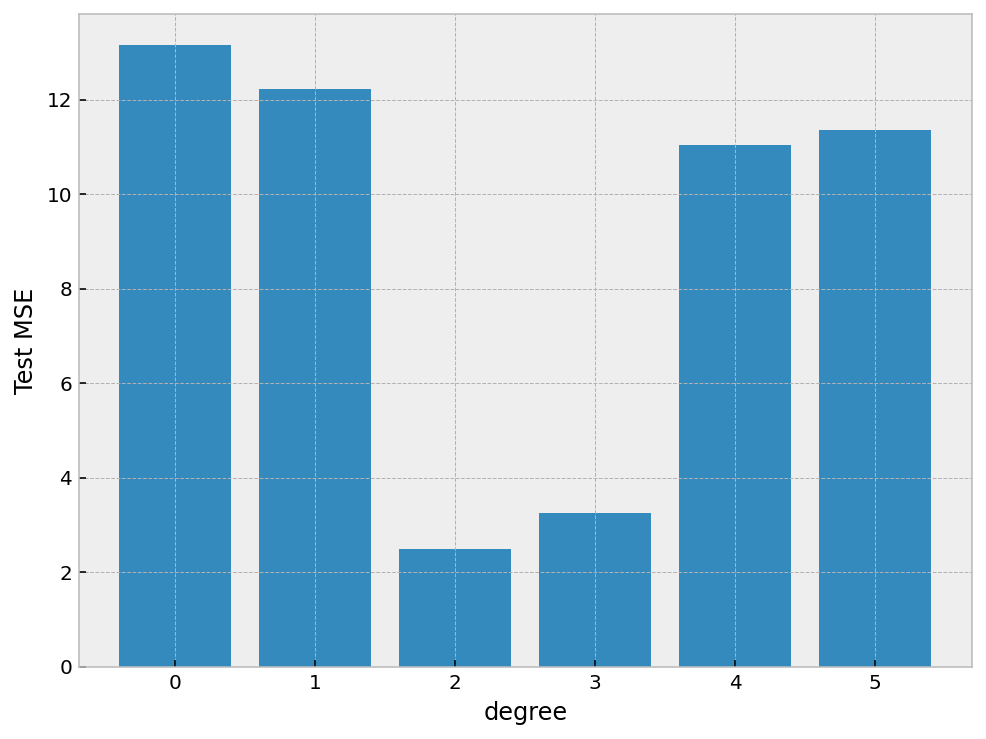

In [28]:
degrees = range(6)
plt.bar(degrees, test_mse)
plt.xlabel('degree')
plt.ylabel('Test MSE');

A different random train/test split...

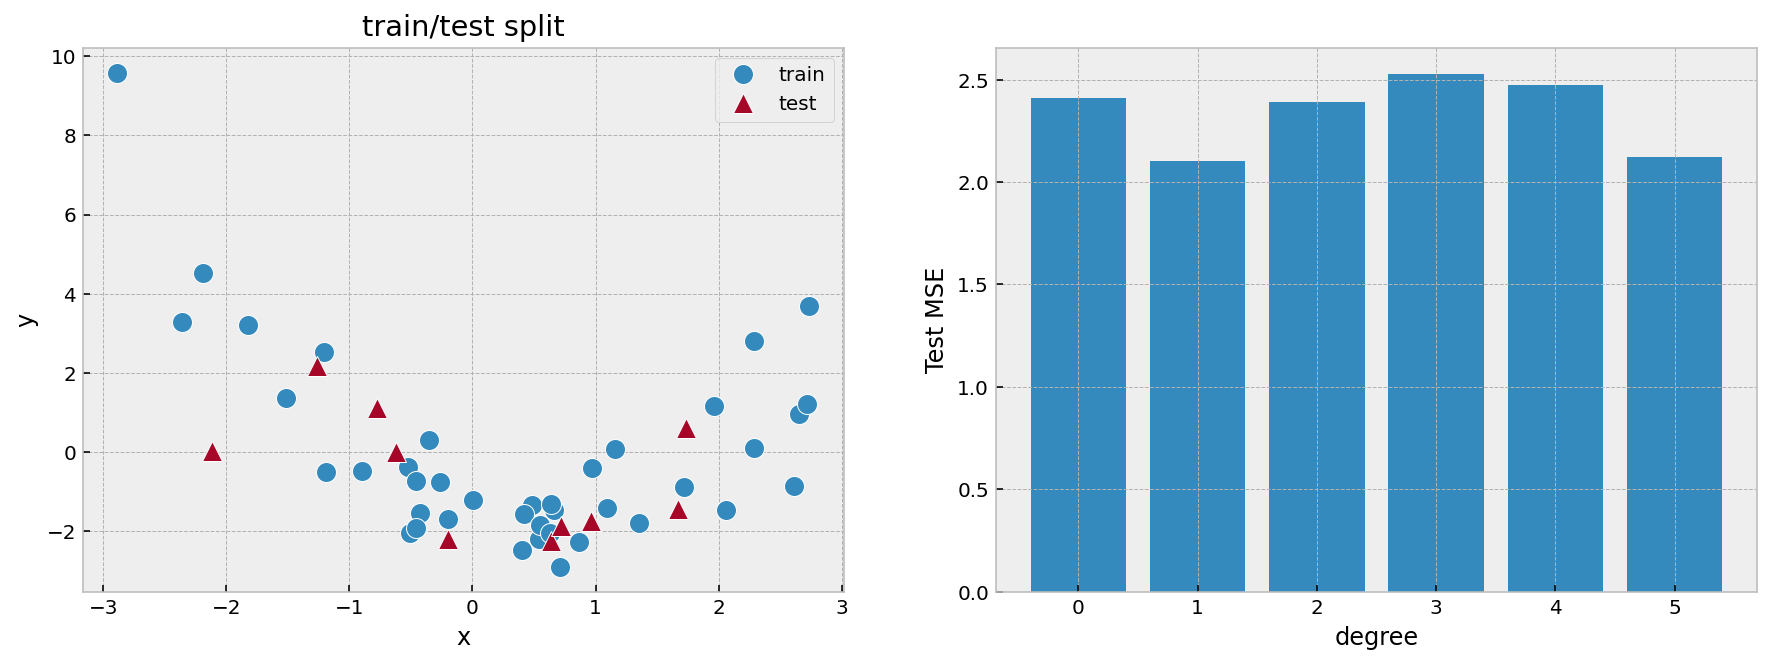

In [37]:
# another train/test split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    shuffle=True, test_size=0.2, 
                                                    random_state=5)
test_mse = []
for degree in range(6):
    lin2poly = PolynomialFeatures(degree=degree)
    Xpoly_train = lin2poly.fit_transform(X_train.reshape([-1,1]))
    Xpoly_test = lin2poly.fit_transform(X_test.reshape([-1,1]))
    
    model = LinearRegression()
    model.fit(Xpoly_train, y_train)
    
    test_SE = (y_test - model.predict(Xpoly_test))**2
    test_mse.append(test_SE.mean())

plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(X_train, y_train, 'o', label='train')
plt.plot(X_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('train/test split')
plt.legend()
plt.subplot(122)
degrees = range(6)
plt.bar(degrees, test_mse)
plt.xlabel('degree')
plt.ylabel('Test MSE');

How you split the data can matter!

### K-fold Cross Validation

In [60]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_indices, test_indices in kf.split(X_all):
    X_train = X_all[train_indices]
    y_train = y_all[train_indices]
    X_test = X_all[test_indices]
    y_test = y_all[test_indices]
    
    # do something with the train/test split for this fold...

In [61]:
for i, (train_indices, test_indices) in enumerate(kf.split(X_all)):
    X_train = X_all[train_indices]
    y_train = y_all[train_indices]
    X_test = X_all[test_indices]
    y_test = y_all[test_indices]
    
    print(i)
    
    # do something with the train/test split for this fold...

0
1
2
3
4


Use 5-fold cross validation to evaluate how variable each of the models to different partitioning of the data into train/test sets.

In [95]:
cv_mse = np.zeros((5, 6))  # folds x models

kf = KFold(n_splits=5, shuffle=True, random_state=0)

for i, (train_indices, test_indices) in enumerate(kf.split(X_all)):
    X_train = X_all[train_indices]
    y_train = y_all[train_indices]
    X_test = X_all[test_indices]
    y_test = y_all[test_indices]
    
    # evaluate test error for all models given the train/test split for this fold
    for degree in range(6):
        lin2poly = PolynomialFeatures(degree=degree)
        Xpoly_train = lin2poly.fit_transform(X_train)
        Xpoly_test = lin2poly.fit_transform(X_test)

        model = LinearRegression()
        model.fit(Xpoly_train, y_train)

        test_SE = (y_test - model.predict(Xpoly_test))**2
        cv_mse[i,degree] = test_SE.mean()

In [63]:
# average test error across folds
cv_mse.mean(axis=0)

array([5.36540566, 5.17769919, 1.43447496, 1.88255104, 2.66351725,
       4.19980805])

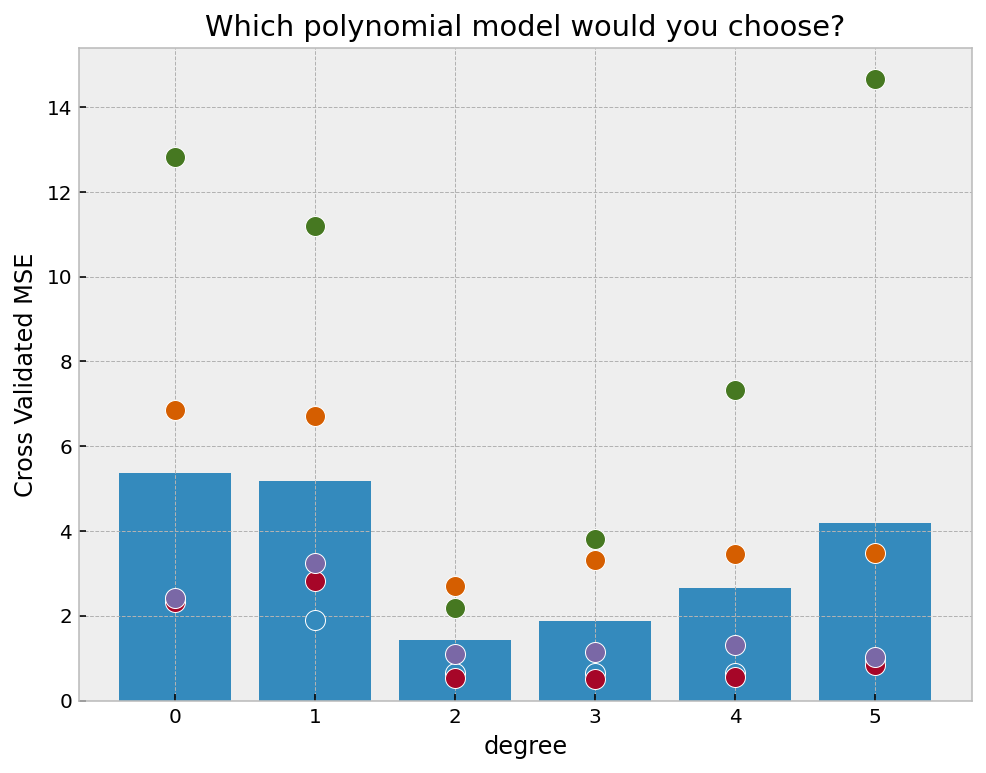

In [97]:
degrees = range(6)
plt.bar(degrees, cv_mse.mean(axis=0))
plt.plot(degrees, cv_mse.T, 'o')
plt.xlabel('degree')
plt.ylabel('Cross Validated MSE')
plt.title('Which polynomial model would you choose?');

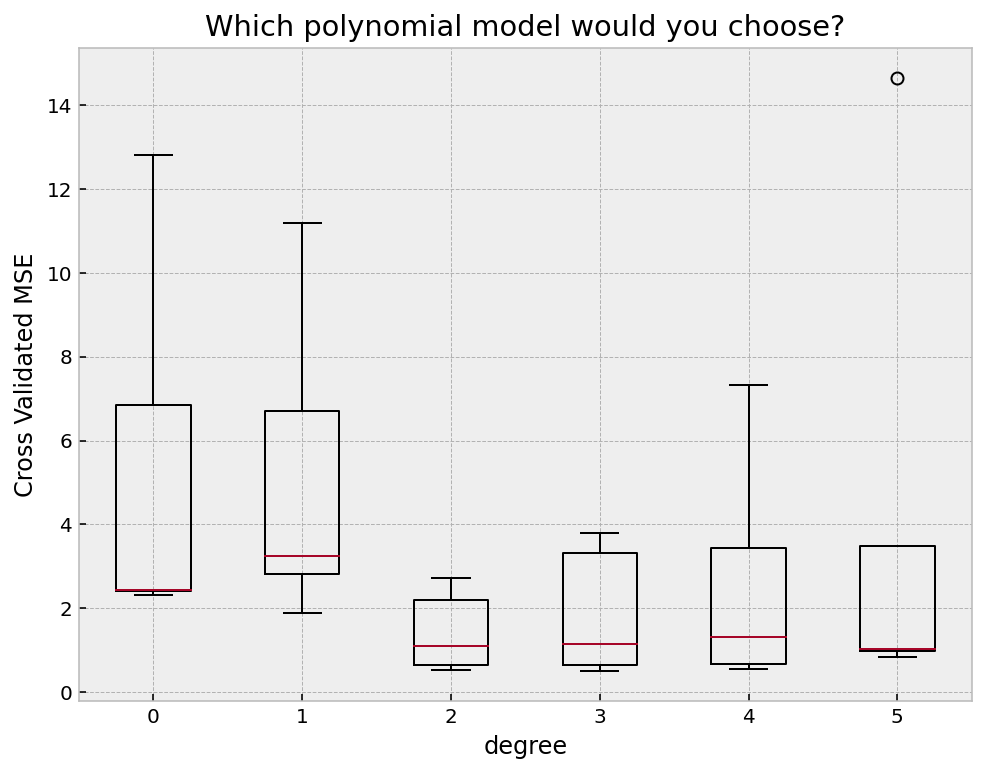

In [96]:
degrees = range(6)
plt.boxplot(cv_mse, positions=degrees)
plt.xlabel('degree')
plt.ylabel('Cross Validated MSE')
plt.title('Which polynomial model would you choose?');

# Example Revisited

Consider the following task from [Steinmetz et al. (2019)](https://www.nature.com/articles/s41586-019-1787-x): For a repeated series of trials, a mouse is trained to rotate a wheel to indicate whether it perceives a Gabor pattern to the left or right. Spike rates from many cortical neurons are recorded on each trial. The goal is to build a model that can predict the mouse's choice based on the spiking of its cortical neurons.

![](images/gabor.png)

Adapted from [Neuromatch Academy](https://compneuro.neuromatch.io/tutorials/W1D4_GeneralizedLinearModels/student/W1D4_Tutorial2.html)

Load the data:

* `choices`: mouse chooses whether a Gabor stimulus is to the left or right on each of 276 trials 
* `spikes`: normalized spike rates for each of 691 neurons across the cortex recorded with Neuropixel probes on each trial

In [2]:
spikes = np.load('mouse_cortical_spiking.npy')
choices = np.load('mouse_left_right_choices.npy')

spikes.shape, choices.shape

((276, 691), (276,))

Use a logistic regression (Bernoulli GLM) to predict the mouse's choice based on its cortical activity.

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none')

X = spikes
y = choices
model.fit(X, y)

predicted_choices = model.predict(X)

accuracy = (choices == predicted_choices).mean()

accuracy

1.0

Perfect accuracy too good to be true?

# Exercise

1. Split the data into train and test sets.
2. Train a logistic regression model on the training set.
3. Evaluate model accuracy on the test set.

The model is only ~80% accurate on trials it was not trained on.

# Exercise

Use 10-fold cross validation to estimate the variability in the accuracy of a logistic regression model given random variation in the cortical activity across trials. Report the mean $\pm$ standard deviation of accuracies across the 10 folds.

In [ ]:
cv_accuracy = np.zeros(10)

kf = KFold(..., random_state=0)

for i, (train_indices, test_indices) in enumerate(kf.split(X, y)):
    X_train = ...
    y_train = ...
    X_test = ...
    y_test = ...
    
    model = ...
    
    # fit model on training set
    ...
    
    # predict choices in test set
    predicted_y_test = ...
    
    # evaluate accuracy for test set predictions
    cv_accuracy[i] = ...

cv_accuracy.mean(), cv_accuracy.std()

For categorical target values `y`, `StratifiedKFold` splits so that train and test sets in each fold have roughly the same proportion of each response category.

In [86]:
from sklearn.model_selection import StratifiedKFold

cv_accuracy = np.zeros(10)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for i, (train_indices, test_indices) in enumerate(kf.split(X, y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    model = LogisticRegression(penalty='none')
    model.fit(X_train, y_train)
    
    predicted_y_test = model.predict(X_test)
    
    cv_accuracy[i] = (y_test == predicted_y_test).mean()

cv_accuracy.mean(), cv_accuracy.std()

(0.8694444444444445, 0.037919614651668584)

K-fold cross validation wrapped up in `cross_validate`.

In [110]:
from sklearn.model_selection import cross_validate

model = LogisticRegression(penalty='none')

cv_results = cross_validate(model, X, y, cv=10)

cv_results['test_score']

array([0.89285714, 0.82142857, 0.78571429, 0.85714286, 1.        ,
       0.82142857, 0.85185185, 0.96296296, 0.85185185, 0.77777778])

In [111]:
cv_results['test_score'].mean(), cv_results['test_score'].std()

(0.8623015873015873, 0.06828126376814818)